## Bisection Method of finding the sublimation radius

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

h = 6.64e-34
k_b = 1.38e-23
A = 1e-19
AU = 1.5e11

def bisection_method(f, a, b, nu_TST, E_b, tol=1e-6, max_iter=10000, expansion_factor=1.05):
    """
    Find the root of f(x) using the Bisection Method.
    
    Parameters:
    f : function
        The function whose root is to be found.
    a, b : float
        The interval [a, b] where the root is located.
    nu_TST, E_b : float
        Additional parameters for the function f.
    tol : float, optional
        The tolerance for convergence (default is 1e-10).
    max_iter : int, optional
        The maximum number of iterations (default is 10000).
    expansion_factor : float, optional
        The factor by which to expand the interval if no sign change is detected (default is 1.5).
    
    Returns:
    root : float
        The approximate root of the function.
    """
    # Adjust the interval if no sign change is detected
    adjustment_count = 0
    while f(a, nu_TST, E_b) * f(b, nu_TST, E_b) >= 0 and adjustment_count < max_iter:
        a -= expansion_factor * (b - a)
        b += expansion_factor * (b - a)
        adjustment_count += 1
        print(f"Adjusting interval to [{a}, {b}]")

    if adjustment_count == max_iter:
        raise ValueError("Failed to find a valid interval with a sign change.")

    iteration = 0
    while (b - a) / 2 > tol and iteration < max_iter:
        c = (a + b) / 2  # Midpoint
        if f(c, nu_TST, E_b) == 0:
            error=(b-a)/2
            return c,error  # Found exact root
        elif f(a, nu_TST, E_b) * f(c, nu_TST, E_b) < 0:
            b = c  # Root is in the left half
        else:
            a = c  # Root is in the right half
        iteration += 1
        #print(f(c, nu_TST, E_b))
    root = (a+b)/2
    error=(b-a)/2
       
    
    return root,error # Return the approximate root, error

# Example function (random polynomial equation)
def transcendental_radius_equation(R, nu_TST, E_b):
    T_0 = 200 
    R_0 = 1.5e11  # 1 AU
    mu = 2.34  # mean molecular mass
    m_p = 1.67e-27  # mass of proton 
    alpha = 1e-2  # alpha viscosity
    G = 6.67e-11  # Gravitational Constant
    M_star = 2e30

    phi1 = k_b * T_0 * np.sqrt(R_0)
    phi2 = ((mu * m_p) / (alpha * k_b * T_0)) * nu_TST * np.sqrt((G * M_star) / R_0)
    final = phi1 * np.log(phi2 * R) - E_b * np.sqrt(R)
    return final 

## Put the text file into a pandas dataframe

In [271]:
import pandas as pd

# Specify the path to text file
file_path = 'Molecular parameters from litgerink 2023 and Minissale 2022.txt'

# Load the text file into a DataFrame
# Adjust the delimiter as needed (e.g., sep='\t' for tab-separated values)
param_df = pd.read_csv(file_path, sep='\t')  # Change sep to the appropriate delimiter

# Change datatypes
param_df['$E_{B}$ (K)'] = param_df['$E_{B}$ (K)'].astype(float)
param_df['\xa0$T_{peak}$ (K)'] = param_df['\xa0$T_{peak}$ (K)'] .astype(float)
param_df.replace(' Variable',np.NaN) # replace 'variable' with np.NaN

#param_df['m (amu)'] = param_df['m (amu)'] .astype(float)

param_df


,Molecule,$\nu$,$E_{B}$ (K),$T_{peak}$ (K),m (amu),Source
0,C2H4,9.100000e+15,2602.000000,45.000000,28.050,Ligterink et al. 2023
1,C2H6,4.800000e+16,2773.000000,46.000000,30.070,Ligterink et al. 2023
2,C3H8,6.500000e+17,3721.000000,59.000000,44.100,Ligterink et al. 2023
3,CH2CHCH3,3.900000e+17,3709.000000,60.000000,42.080,Ligterink et al. 2023
4,CH3PH2,4.400000e+17,4662.000000,74.000000,34.080,Ligterink et al. 2023
5,CH3I,9.300000e+17,4758.000000,75.000000,141.940,Ligterink et al. 2023
6,CH3CCH,1.900000e+17,4624.000000,75.000000,41.050,Ligterink et al. 2023
7,C4H10,5.700000e+18,4946.000000,76.000000,58.120,Ligterink et al. 2023
8,CH3CHO,9.700000e+17,4882.000000,77.000000,44.050,Ligterink et al. 2023
9,H2SO2,2.600000e+18,5035.000000,78.000000,66.060,Ligterink et al. 2023


In [272]:
for index, row in param_df.iterrows():
    #if row['Surface'] != r'$$CO_{2}$$':
    # Interval where the root lies (must bracket a root)
    a, b = 1 * AU, 1e6 * AU
    nu= row[r'$\nu$']
    E_b = (row[r'$E_{B}$ (K)']*8.314)/6.02e23 # from K--> J/mol --> J
               
               

        # Finding the root using Bisection Method
    try:
        
        root,error = bisection_method(transcendental_radius_equation, a, b, nu, E_b)
        param_df.loc[index,r'$R_{s} (AU)$'] = root/AU
#       joined_df.loc[index,r'$\Delta R_{s} (AU)$'] = error/AU
        print(f"Approximate root for {row['Molecule']}: {root / AU:.6f}")
            
    except ValueError as e:
        print(f"Error finding root for {row['Molecule']}: {e}")

Approximate root for C2H4: 26.641862
Approximate root for C2H6: 24.574883
Approximate root for C3H8: 14.484804
Approximate root for CH2CHCH3: 14.365889
Approximate root for CH3PH2: 9.003495
Approximate root for CH3I: 8.824662
Approximate root for CH3CCH: 8.931742
Approximate root for C4H10: 8.584067
Approximate root for CH3CHO: 8.379793
Approximate root for H2SO2: 8.091566
Approximate root for H2CCO: 7.916792
Approximate root for N2H2: 7.681245
Approximate root for c-C3H4O: 7.250446
Approximate root for HNCO: 7.233379
Approximate root for CH2NH: 7.006662
Approximate root for CH3OOCH3: 6.689299
Approximate root for CH3CHCH2O: 6.329837
Approximate root for CH3CH2OCHO: 6.295404
Approximate root for CH3OCHO: 6.341780
Approximate root for CH3NC: 5.971079
Approximate root for NO2: 5.973082
Approximate root for HCOPH2: 5.686728
Approximate root for CH3CH2NH2: 5.557833
Approximate root for P2H4: 5.277131
Approximate root for CH3NH2: 5.326577
Approximate root for CH3CH2CHO: 5.183008
Approximate

/tmp/ipykernel_34586/297162963.py:74: RuntimeWarning: invalid value encountered in log
  final = phi1 * np.log(phi2 * R) - E_b * np.sqrt(R)
/tmp/ipykernel_34586/297162963.py:74: RuntimeWarning: invalid value encountered in sqrt
  final = phi1 * np.log(phi2 * R) - E_b * np.sqrt(R)


Approximate root for H2P(O)OH: 3152497.847500
Adjusting interval to [-1.574996925e+17, 4.72874677125e+17]
Approximate root for CH3SCH3: 3152497.847500
Adjusting interval to [-1.574996925e+17, 4.72874677125e+17]
Approximate root for C5H6 N2O2: 3152497.847500
Adjusting interval to [-1.574996925e+17, 4.72874677125e+17]
Approximate root for C24H12: 3152497.847500
Adjusting interval to [-1.574996925e+17, 4.72874677125e+17]
Approximate root for C4H5 N3O: 3152497.847500
Adjusting interval to [-1.574996925e+17, 4.72874677125e+17]
Approximate root for C5H5 N5: 3152497.847500
Adjusting interval to [-1.574996925e+17, 4.72874677125e+17]
Approximate root for C5H5 N5O: 3152497.847500
Adjusting interval to [-1.574996925e+17, 4.72874677125e+17]
Approximate root for C32H14: 3152497.847500
Adjusting interval to [-1.574996925e+17, 4.72874677125e+17]
Approximate root for C60: 3152497.847500
Approximate root for H: 1040.483583
Approximate root for H2: 703.935872
Adjusting interval to [-1.574996925e+17, 4.7

In [211]:
param_df

,Molecule,$\nu$,$E_{B}$ (K),$T_{peak}$ (K),m (amu),Source,$R_{s} (AU)$
0,C2H4,9.100000e+15,2602.000000,45.000000,28.050,Ligterink et al. 2023,2.664186e+01
1,C2H6,4.800000e+16,2773.000000,46.000000,30.070,Ligterink et al. 2023,2.457488e+01
2,C3H8,6.500000e+17,3721.000000,59.000000,44.100,Ligterink et al. 2023,1.448480e+01
3,CH2CHCH3,3.900000e+17,3709.000000,60.000000,42.080,Ligterink et al. 2023,1.436589e+01
4,CH3PH2,4.400000e+17,4662.000000,74.000000,34.080,Ligterink et al. 2023,9.003495e+00
5,CH3I,9.300000e+17,4758.000000,75.000000,141.940,Ligterink et al. 2023,8.824662e+00
6,CH3CCH,1.900000e+17,4624.000000,75.000000,41.050,Ligterink et al. 2023,8.931742e+00
7,C4H10,5.700000e+18,4946.000000,76.000000,58.120,Ligterink et al. 2023,8.584067e+00
8,CH3CHO,9.700000e+17,4882.000000,77.000000,44.050,Ligterink et al. 2023,8.379793e+00
9,H2SO2,2.600000e+18,5035.000000,78.000000,66.060,Ligterink et al. 2023,8.091566e+00


## Create a Scatter Plot

/tmp/ipykernel_34586/1146617022.py:53: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,1e4)


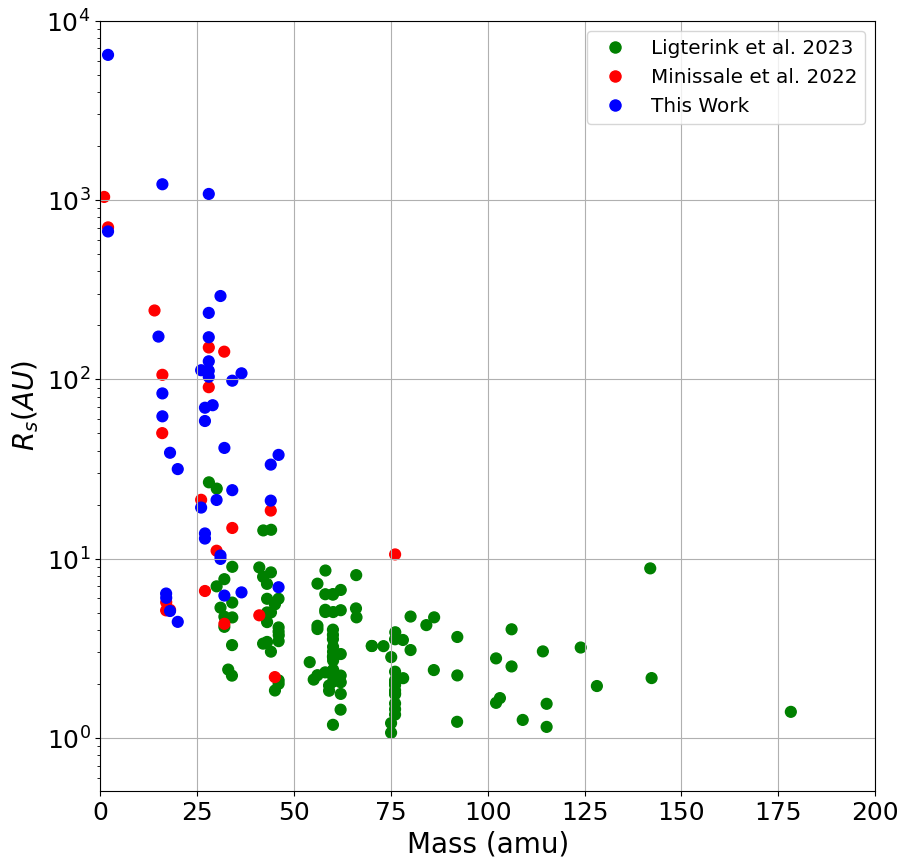

In [286]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd


# Define colors based on the source
colour = ['green' if row['Source'] == 'Ligterink et al. 2023' else 'blue' if row['Source'] == 'This Work' else 'red'for index, row in param_df.iterrows()]



# Create a unique legend
unique_sources = param_df['Source'][param_df['$R_{s} (AU)$']<1e4].unique()
unique_colors = ['green' if source == 'Ligterink et al. 2023' else 'blue' if source == 'This Work' else 'red' for source in unique_sources]

#Line of best fit 

def linear_equation(x,a,b):
    return a * 10**(-b * x)

popt, pcov = curve_fit(linear_equation, 
                       (param_df['m (amu)'][(param_df['$R_{s} (AU)$']<1e4) & (param_df['Source']!= 'This Work')]),
                           np.log10(param_df['$R_{s} (AU)$'][(param_df['$R_{s} (AU)$']<1e4) & (param_df['Source']!= 'This Work')])
                                           ,
                       p0=(10,0.1))

a_fit, b_fit = popt
a_err, b_err = np.sqrt(np.diag(pcov))

lin_fit = linear_equation(param_df['m (amu)'], a_fit, b_fit)
lin_fit_upper = linear_equation(param_df['m (amu)'], a_fit + a_err, 
                                b_fit + b_err)
lin_fit_lower = linear_equation(param_df['m (amu)'], a_fit - a_err,
                                b_fit - b_err)


plt.figure(figsize=(10, 10))
# Scatter plot
plt.scatter(param_df['m (amu)'], param_df['$R_{s} (AU)$'], color=colour, marker='o', s=60)
# plt.plot(param_df['m (amu)'], lin_fit, color='orange')
# plt.fill_between(param_df['m (amu)'], lin_fit_lower, lin_fit_upper, color='orange', alpha=0.2)

equation = fr'$R_{{s}} = {a_fit:.2f}(\pm {a_err:.2f}) 10^{{-{b_fit:.3f}(\pm {b_err:.3f}) m}}$'



plt.yscale('log')

plt.xlabel('Mass (amu)', fontsize=20)
plt.ylabel(r'$R_{s} (AU)$', fontsize=20)
plt.tick_params(axis='both',which='major',labelsize=18)
plt.grid(True)
plt.xlim(0, 200)
plt.ylim(0,1e4)
# Create legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', label=source, markerfacecolor=color, markersize=10) 
           for source, color in zip(unique_sources, unique_colors)]
# Add the legend
plt.legend(handles=handles,fontsize='x-large')
# plt.text(0.12, 0.14, equation, fontsize=14, verticalalignment='bottom',
#          horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.5), color='orange')




In [185]:
unique_sources

array(['Ligterink et al. 2023', 'Minissale et al. 2022'], dtype=object)